<a href="https://colab.research.google.com/github/jkaged/Complete-Python-3-Bootcamp/blob/master/PyPortfolioOpt_%26_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Data Gathering with YFinance, PyPortfolioOpt & Prophet

Data gathering used to be a monumental task. However, nowadays we can get a company’s fundamental data within seconds.

In [ ]:
!pip install prophet
!pip install yfinance
!pip install pip install PyPortfolioOpt


In [ ]:
#Import Libs
import yfinance as yf
import pandas as df
from fbprophet import Prophet
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import risk_models
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [ ]:
#Create stock object and get financial data (AAPL)
aapl = yf.Ticker("AAPL")
aapl.financials.head(3)

,2021-09-25,2020-09-26,2019-09-28,2018-09-29
Research Development,21914000000.0,18752000000.0,16217000000.0,14236000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,109207000000.0,67091000000.0,65737000000.0,72903000000.0


In [ ]:
#Get stock price data for a 1y
aapl.history(period="1y").head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-15,148.392213,149.147890,146.254417,147.636520,106820300,0.0,0
2021-07-16,147.616659,148.909262,145.051313,145.558411,93251400,0.0,0
2021-07-19,142.933380,143.251570,140.865195,141.640762,121434600,0.0,0
2021-07-20,142.645057,146.264379,142.147897,145.319763,96350000,0.0,0
2021-07-21,144.703271,145.299869,143.808390,144.574005,74993500,0.0,0
2021-07-22,145.110949,147.358105,144.981683,145.966064,77338200,0.0,0
2021-07-23,146.711792,147.875144,146.085366,147.716049,71447400,0.0,0
2021-07-26,147.427705,148.978840,146.860936,148.143616,72434100,0.0,0
2021-07-27,148.272875,148.362375,144.723163,145.936234,104818600,0.0,0


**Tip: Many methods that you should know 😬**

*   **Info:** Return a dictionary that contains pieces of information such as price, financial statements, and financial indicators.
*   **actions:** Return DataFrame of dividends and splits ratio by date.
*   **Financials:** Return DataFrame with financial statement data such as Revenue, Net Income, and EBIT for the last four years.
*   **Major Holders:** Return DataFrame that contains a list of shares of major holders
*   **Institutional Holders:** Return DataFrame that contains a list of shares of institutional holders.
*   **Balance Sheet:** Return a DataFrame that contains balance sheet data for the last four years.
*   **Earnings:** Return a DataFrame that contains earnings data for the last four years
*   **Sustainability:** Return a DataFrame that contains list of environmental concerns and information on whether or not the company is involved in these sectors
*   **Recommendations:** Return a DataFrame that lists recommendations from analysts and firms. It includes grades like Buy, Hold, Underperform, etc.

In [ ]:
#Preparing the data
aapl.history(period='3y')['Open'].head()

Date
2019-07-15    49.798776
2019-07-16    49.920775
2019-07-17    49.789020
2019-07-18    49.776814
2019-07-19    50.213586
Name: Open, dtype: float64

# Price Forecasting
The stock market is known for its volatility, dynamics, and non-linearity.Therefore, financial analysts, researchers, and data scientists continue to seek analytical methods to identify stock market trends. This gave rise to the concept of algorithmic trading, which executes orders using automated and pre-programmed trading strategies.

Price stock forecasting is an important field of study and one of the top applications of machine learning. Machine learning price stock forecasting helps predict the future value of company stocks and other financial assets traded on exchanges. The overall idea of predicting stock prices is to make some profit.

## Forecasting Models Prophet Time-Series

Prophet is a forecasting method that uses an additive model to predict time-series data. This model takes into account the effects of seasonal trends, as well as holiday periods. Seasonal data is best processed using time series that have strong seasonal effects and several seasons of historical data.

###Train the data

In [ ]:
train_size = 252*3 # use 3 year of data as traing
val_size = 252 #use 1 year of sata as validation
train_val_size = train_size + val_size #Size od train  + validarion set
i = train_val_size #Day to forecast
H = 21

df = aapl.history(period='3y')[['Open']].reset_index()
df.columns = ['ds','y']

#Fit prophet model
m = Prophet()
m.fit(df[i-train_val_size:i])

#Create datafrmae with the dates we want to predict
future = m.make_future_dataframe(periods=2*H)

#Eliminate weekend from future dataframe
future['day'] = future['ds'].dt.weekday
future = future[future['day']<=4]

#Predict
forecast = m.predict(future)



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


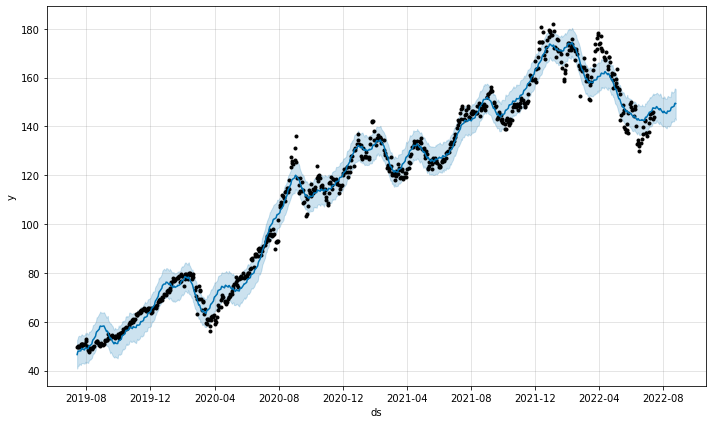

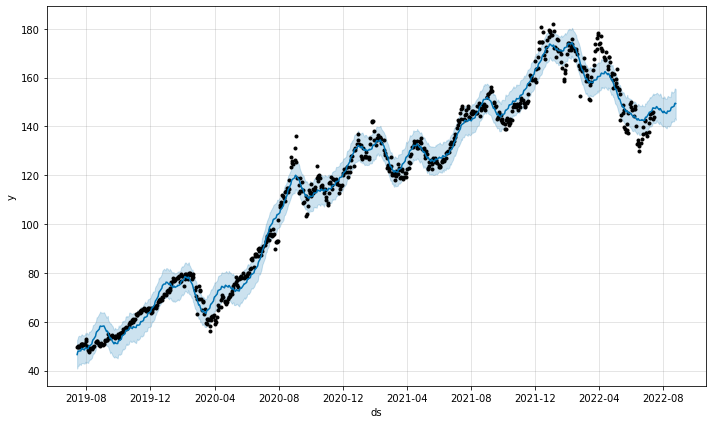

In [ ]:
#Plotting the data
m.plot(forecast)

# PyPortfolioOpt

### Prepare our data

Here we need to prepare our data and this could be done easily using yfinance

In [ ]:
stock = ["SPY","TLT","GLD","AAPL","MCD","DIS"]
stock_data = yf.download(stock,period='10y')["Adj Close"]

#Display stock data
stock_data.tail(10)

[*********************100%***********************]  6 of 6 completed


,AAPL,DIS,GLD,MCD,SPY,TLT
Date,,,,,,
2022-06-30,136.720001,94.400002,168.460007,246.880005,377.250000,114.643005
2022-07-01,138.929993,96.139999,168.320007,252.960007,381.239990,115.820000
2022-07-05,141.559998,97.180000,164.750000,252.289993,381.959991,116.730003
2022-07-06,142.919998,96.080002,162.139999,251.460007,383.250000,114.769997
2022-07-07,146.350006,97.430000,162.229996,252.940002,388.989990,113.760002
2022-07-08,147.039993,95.860001,162.300003,253.240005,388.670013,112.500000
2022-07-11,144.869995,93.639999,161.429993,253.279999,384.230011,114.440002
2022-07-12,145.860001,93.599998,160.830002,251.479996,380.829987,115.120003
2022-07-13,145.490005,92.940002,161.600006,252.669998,378.829987,116.440002


## Calculate mean historical return

Using PyPortfolioOpt, we could calculate the mean historical return to find out the characteristics of each stocks

In [ ]:

S = risk_models.sample_cov(stock_data)
mu = mean_historical_return(stock_data)
mu

AAPL    0.231826
DIS     0.079376
GLD     0.003278
MCD     0.138391
SPY     0.129530
TLT     0.011804
dtype: float64

### Calculate the optimal weights according to the efficient frontier

We then calculate the weights for our portfolio in just couple lines of code. We see here that we shouldn’t put any capital in DIS nor GLD.

In [ ]:
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
ef.clean_weights()



OrderedDict([('AAPL', 0.36812),
             ('DIS', 0.0),
             ('GLD', 0.0),
             ('MCD', 0.32109),
             ('SPY', 0.10749),
             ('TLT', 0.2033)])

### We can also get the performance of our portfolio within that period

Our portfolio would have had a 0.84 sharpe ratio 😬

In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 14.6%
Annual volatility: 15.3%
Sharpe Ratio: 0.82


(0.14609827960454275, 0.15302747177810017, 0.8240238052641522)

Calculate the number of shares we need to buy if we have $20,000 usd of capital to allocate.

In [ ]:
latest_price = get_latest_prices(stock_data)
da = DiscreteAllocation(weights,latest_price,total_portfolio_value=20000)
allocation,lefover = da.lp_portfolio()
allocation

{'AAPL': 49, 'MCD': 25, 'SPY': 6, 'TLT': 35}